# 1. Importing modules and Loading Data

In [1]:
import pandas as pd
import numpy as np

# graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

DATA_DIR = "data/"

# load the dataset
df_train = pd.read_csv(DATA_DIR + "train.csv")
df_test = pd.read_csv(DATA_DIR + "test.csv")

# 2. Exploratory Data Analysis

In [2]:
df_train.head(5)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

In [4]:
# check for missing values and show percentage
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_df = missing_df[missing_df['Missing Values'] > 0]
missing_df.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
veil-type,2957493,94.884350
spore-print-color,2849682,91.425482
stem-root,2757023,88.452732
veil-color,2740947,87.936970
stem-surface,1980861,63.551362
gill-spacing,1258435,40.373988
cap-surface,671023,21.528227
gill-attachment,523936,16.809280
ring-type,128880,4.134818
gill-color,57,0.001829


In [5]:
# Check for duplicate rows
duplicate_rows = df_train.duplicated().sum()
print(f"Number of duplicate rows in training set: {duplicate_rows}")

Number of duplicate rows in training set: 0


In [6]:
# get categorical and numerical columns
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = [col for col in df_train.select_dtypes(include=['int64', 'float64']).columns if col != 'id']

print(f"Categorical columns ({len(categorical_cols)}):", categorical_cols)
print(f"Numerical columns ({len(numerical_cols)}):", numerical_cols)

Categorical columns (18): ['class', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
Numerical columns (3): ['cap-diameter', 'stem-height', 'stem-width']


In [7]:
# descriptive statistics for numerical features
df_train[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,3116941.0,6.309848,4.657931,0.03,3.32,5.75,8.24,80.67
stem-height,3116945.0,6.348333,2.699755,0.00,4.67,5.88,7.41,88.72
stem-width,3116945.0,11.153785,8.095477,0.00,4.97,9.65,15.63,102.90


In [8]:
df_train[categorical_cols].describe().T

,count,unique,top,freq
class,3116945,2,p,1705396
cap-shape,3116905,74,x,1436026
cap-surface,2445922,83,t,460777
cap-color,3116933,78,n,1359542
does-bruise-or-bleed,3116937,26,f,2569743
gill-attachment,2593009,78,a,646034
gill-spacing,1858510,48,c,1331054
gill-color,3116888,63,w,931538
stem-root,359922,38,b,165801
stem-surface,1136084,60,s,327610


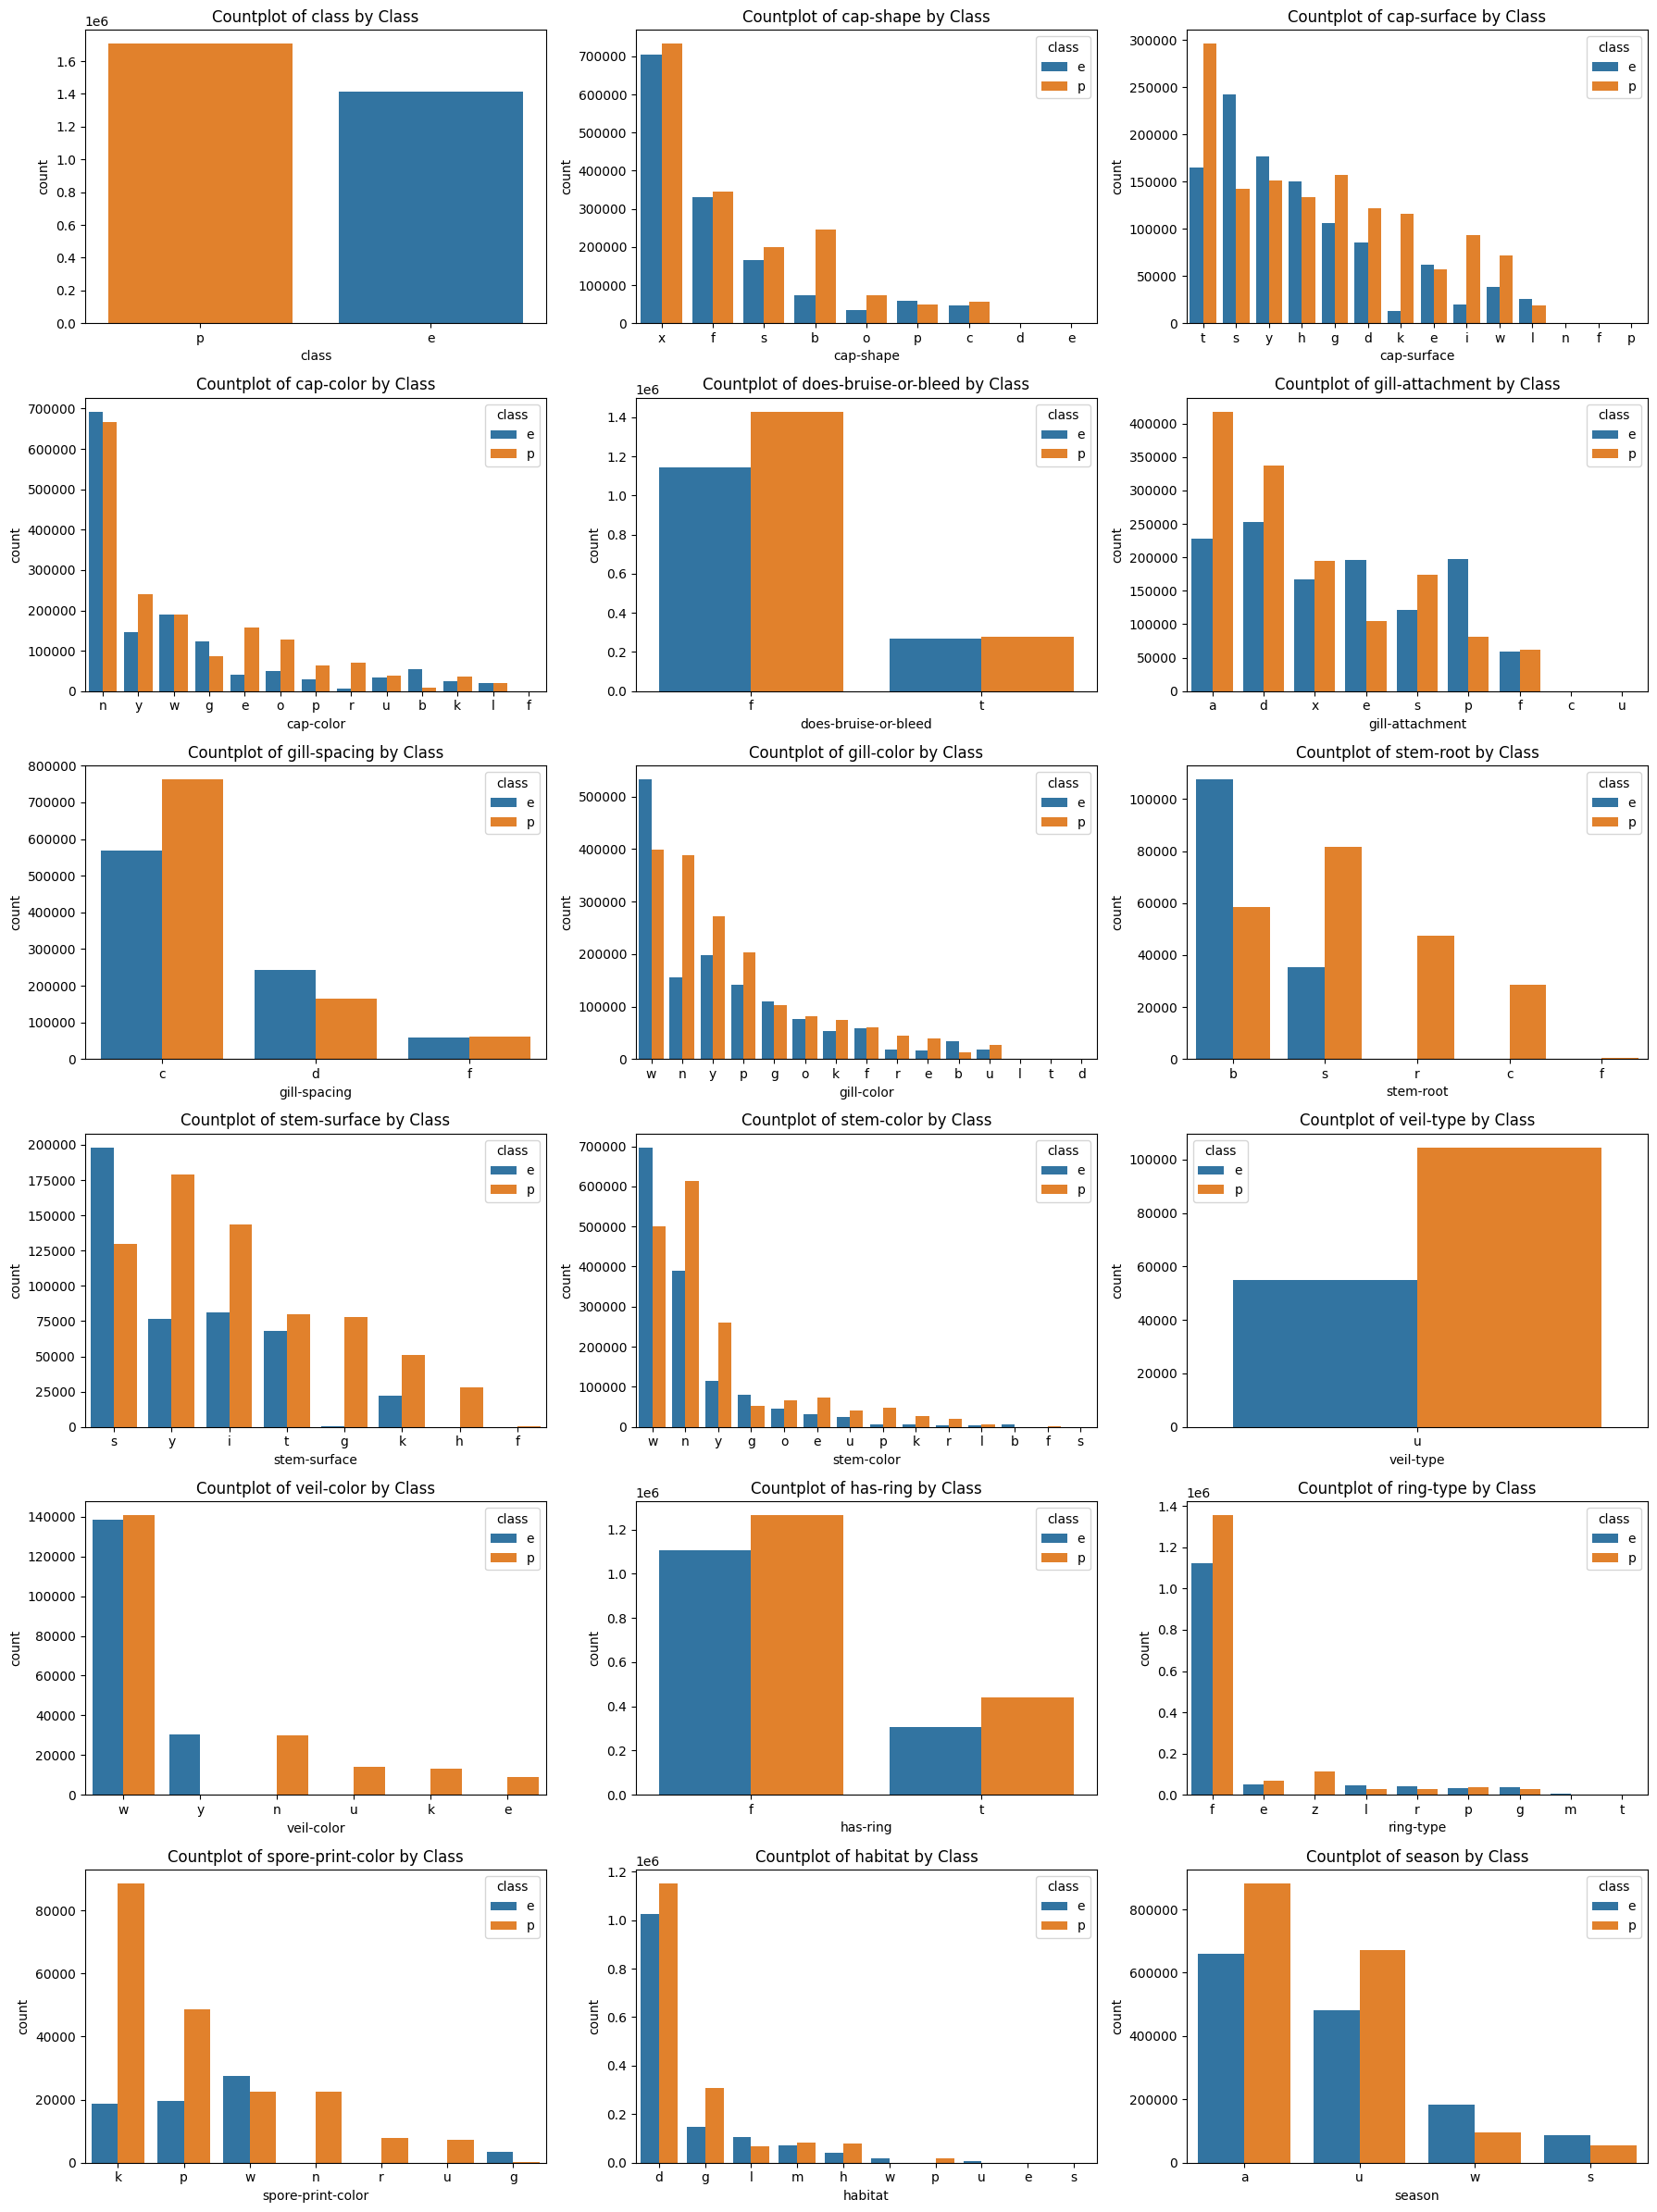

In [9]:
# Plot countplots for categorical features with class as hue, arranged in a grid of 6x3
# exclude counts lower than 50 for clarity
num_cols = 3
num_rows = 6
plt.figure(figsize=(18, 24))
for i, col in enumerate(categorical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=df_train, x=col, hue='class', order=df_train[col].value_counts()[df_train[col].value_counts() > 50].index)
    plt.title(f'Countplot of {col} by Class')
    # plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()


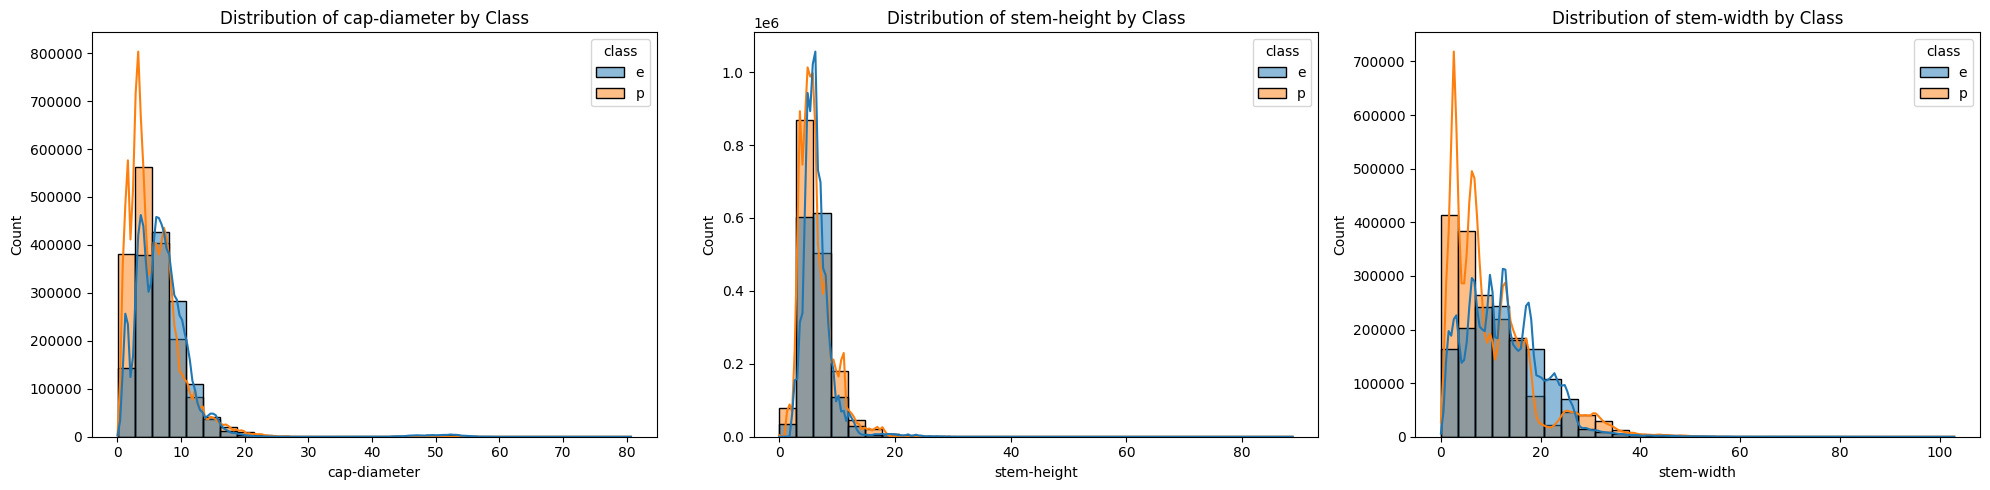

In [10]:
# plot distribution plots for numerical features in one row
plt.figure(figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.histplot(data=df_train, x=col, hue='class', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Class')
    plt.tight_layout()
plt.show()

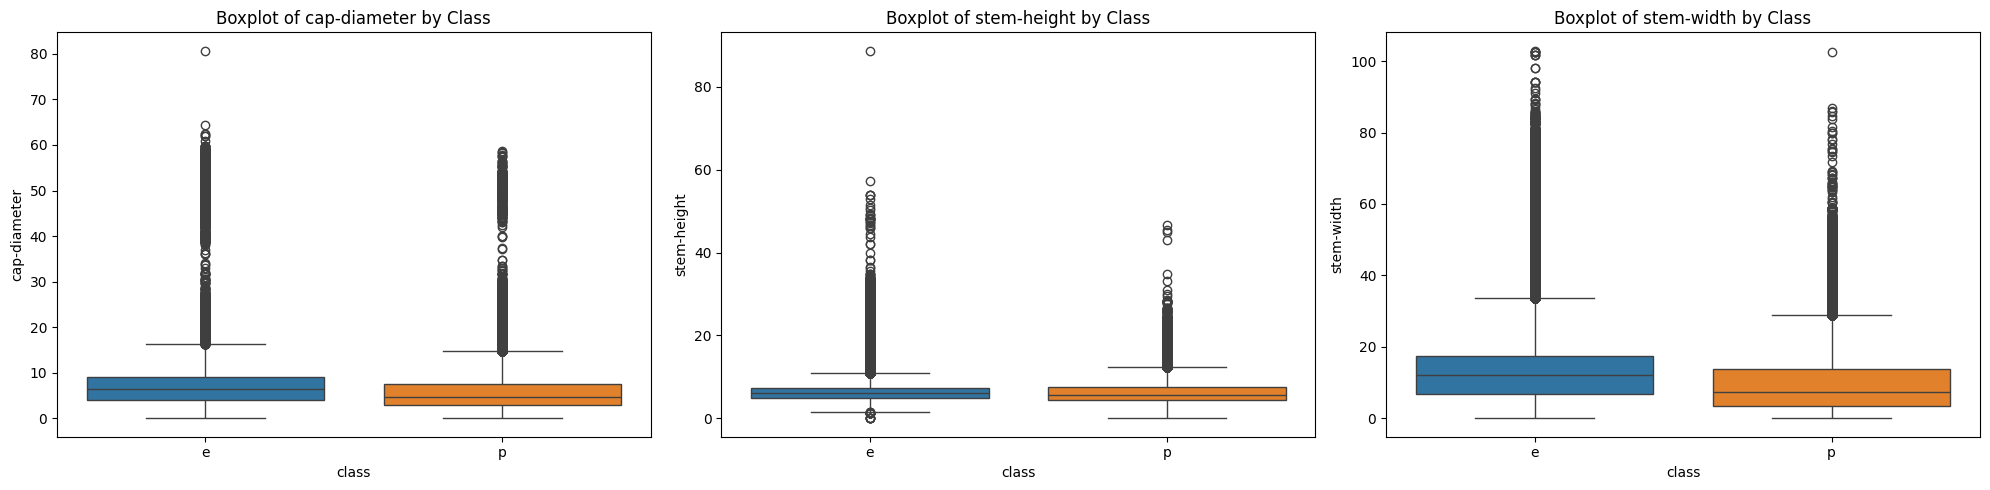

In [11]:
# plot outlier detection for numerical features using boxplots
plt.figure(figsize=(20, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(data=df_train, x='class', hue='class', y=col)
    plt.title(f'Boxplot of {col} by Class')
    plt.tight_layout()
plt.show()

# 3. Preprocessing

In [12]:
target_col = 'class'
feature_categorical_cols = [col for col in categorical_cols if col != target_col]

def preprocess(df, is_train=True):
    df = df.copy()
    
    # Handle categorical missing values
    for col in feature_categorical_cols:
        df[col] = df[col].fillna('missing')
    
    # Handle numerical missing values (median imputation)
    for col in numerical_cols:
        df[col] = df[col].fillna(df[col].median())
    
    return df

# Apply to both datasets
df_train_clean = preprocess(df_train, is_train=True)
df_test_clean = preprocess(df_test, is_train=False)

# Encode target
df_train_clean['target'] = (df_train_clean['class'] == 'p').astype(int)  # 1 = poisonous

In [13]:
# 1. Frequency encoding for high-cardinality categoricals
def frequency_encode(train_df, test_df, columns):
    for col in columns:
        freq = train_df[col].value_counts(normalize=True)
        train_df[f'{col}_freq'] = train_df[col].map(freq)
        test_df[f'{col}_freq'] = test_df[col].map(freq).fillna(0)
    return train_df, test_df

# 2. Interaction features (optional but helpful)
df_train_clean['cap_volume'] = df_train_clean['cap-diameter'] * df_train_clean['stem-height']
df_test_clean['cap_volume'] = df_test_clean['cap-diameter'] * df_test_clean['stem-height']

df_train_clean['stem_ratio'] = df_train_clean['stem-height'] / (df_train_clean['stem-width'] + 1)
df_test_clean['stem_ratio'] = df_test_clean['stem-height'] / (df_test_clean['stem-width'] + 1)

In [14]:
from sklearn.preprocessing import LabelEncoder

# For tree-based models (LightGBM, XGBoost, CatBoost), label encoding works well
label_encoders = {}
for col in feature_categorical_cols:
    le = LabelEncoder()
    # Fit on combined train+test to handle unseen categories
    combined = pd.concat([df_train_clean[col], df_test_clean[col]], axis=0)
    le.fit(combined.astype(str))
    df_train_clean[col + '_encoded'] = le.transform(df_train_clean[col].astype(str))
    df_test_clean[col + '_encoded'] = le.transform(df_test_clean[col].astype(str))
    label_encoders[col] = le

In [15]:
# Define feature columns
encoded_cols = [col + '_encoded' for col in feature_categorical_cols]
feature_cols = numerical_cols + encoded_cols + ['cap_volume', 'stem_ratio']

X = df_train_clean[feature_cols]
y = df_train_clean['target']
X_test = df_test_clean[feature_cols]

# 4. Feature Selection and Engineering

In [28]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import matthews_corrcoef

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'device': 'gpu',  # GPU
        'learning_rate': trial.suggest_float('learning_rate', 0.03, 0.15),
        'num_leaves': trial.suggest_int('num_leaves', 32, 128),
        'min_child_samples': trial.suggest_int('min_child_samples', 30, 100),
    }
    
    # Use only 2 folds instead of 3
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
    mcc_scores = []
    
    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val)
        
        model = lgb.train(
            params,
            train_data,
            num_boost_round=500,  # Reduced from 1000
            valid_sets=[val_data],
            callbacks=[lgb.early_stopping(30), lgb.log_evaluation(0)]  # Reduced from 50
        )
        
        preds = model.predict(X_val)
        mcc_scores.append(matthews_corrcoef(y_val, (preds > 0.5).astype(int)))
    
    return np.mean(mcc_scores)

# Fewer trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20, show_progress_bar=True)  # Reduced from 50

# Get the best hyperparameters
print(f"Best MCC: {study.best_value:.5f}")
print(f"Best params: {study.best_params}")

# Save best params for later use
best_lgb_params = study.best_params

[I 2025-12-11 14:08:20,099] A new study created in memory with name: no-name-703d7ba8-90c2-4abd-a97b-2f62c5e1c7b2
  0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	valid_0's binary_logloss: 0.0384551
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	valid_0's binary_logloss: 0.0384954


Best trial: 0. Best value: 0.983286:   5%|▌         | 1/20 [01:01<19:21, 61.13s/it]

[I 2025-12-11 14:09:21,232] Trial 0 finished with value: 0.9832864547085092 and parameters: {'learning_rate': 0.13521319786758362, 'num_leaves': 54, 'min_child_samples': 62}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0383307
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0382741


Best trial: 0. Best value: 0.983286:  10%|█         | 2/20 [02:04<18:42, 62.35s/it]

[I 2025-12-11 14:10:24,438] Trial 1 finished with value: 0.9832151731560382 and parameters: {'learning_rate': 0.09183678627944641, 'num_leaves': 49, 'min_child_samples': 68}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[240]	valid_0's binary_logloss: 0.0387707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	valid_0's binary_logloss: 0.0388117


Best trial: 0. Best value: 0.983286:  15%|█▌        | 3/20 [02:58<16:36, 58.63s/it]

[I 2025-12-11 14:11:18,624] Trial 2 finished with value: 0.9829425025012573 and parameters: {'learning_rate': 0.10963154726215492, 'num_leaves': 109, 'min_child_samples': 32}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[200]	valid_0's binary_logloss: 0.0389176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[217]	valid_0's binary_logloss: 0.0389535


Best trial: 0. Best value: 0.983286:  20%|██        | 4/20 [03:43<14:11, 53.25s/it]

[I 2025-12-11 14:12:03,622] Trial 3 finished with value: 0.9828872074140057 and parameters: {'learning_rate': 0.13958648831938336, 'num_leaves': 99, 'min_child_samples': 41}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	valid_0's binary_logloss: 0.0385839
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	valid_0's binary_logloss: 0.03866


Best trial: 0. Best value: 0.983286:  25%|██▌       | 5/20 [04:40<13:36, 54.44s/it]

[I 2025-12-11 14:13:00,196] Trial 4 finished with value: 0.9830239005748213 and parameters: {'learning_rate': 0.10505925301133713, 'num_leaves': 86, 'min_child_samples': 38}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0385194
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0387415


Best trial: 0. Best value: 0.983286:  30%|███       | 6/20 [05:54<14:14, 61.07s/it]

[I 2025-12-11 14:14:14,130] Trial 5 finished with value: 0.982960616878388 and parameters: {'learning_rate': 0.05403090496640464, 'num_leaves': 52, 'min_child_samples': 88}. Best is trial 0 with value: 0.9832864547085092.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	valid_0's binary_logloss: 0.0380604
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0382089


Best trial: 6. Best value: 0.983403:  35%|███▌      | 7/20 [07:03<13:49, 63.81s/it]

[I 2025-12-11 14:15:23,574] Trial 6 finished with value: 0.9834033447109262 and parameters: {'learning_rate': 0.10330391982197724, 'num_leaves': 53, 'min_child_samples': 84}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	valid_0's binary_logloss: 0.0383453
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	valid_0's binary_logloss: 0.0383636


Best trial: 6. Best value: 0.983403:  40%|████      | 8/20 [07:55<12:01, 60.16s/it]

[I 2025-12-11 14:16:15,926] Trial 7 finished with value: 0.9833654687861905 and parameters: {'learning_rate': 0.12063435123320418, 'num_leaves': 37, 'min_child_samples': 55}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[168]	valid_0's binary_logloss: 0.0388798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[189]	valid_0's binary_logloss: 0.038935


Best trial: 6. Best value: 0.983403:  45%|████▌     | 9/20 [08:35<09:52, 53.84s/it]

[I 2025-12-11 14:16:55,851] Trial 8 finished with value: 0.9828757218813724 and parameters: {'learning_rate': 0.13475739027681505, 'num_leaves': 98, 'min_child_samples': 44}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's binary_logloss: 0.0390461
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0390788


Best trial: 6. Best value: 0.983403:  50%|█████     | 10/20 [10:09<11:01, 66.18s/it]

[I 2025-12-11 14:18:29,665] Trial 9 finished with value: 0.9824979527466455 and parameters: {'learning_rate': 0.03368918988119457, 'num_leaves': 77, 'min_child_samples': 45}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	valid_0's binary_logloss: 0.0383691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	valid_0's binary_logloss: 0.0384466


Best trial: 6. Best value: 0.983403:  55%|█████▌    | 11/20 [11:39<11:01, 73.46s/it]

[I 2025-12-11 14:19:59,660] Trial 10 finished with value: 0.9830135617970254 and parameters: {'learning_rate': 0.07181210951409385, 'num_leaves': 127, 'min_child_samples': 98}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0382943
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's binary_logloss: 0.0383643


Best trial: 6. Best value: 0.983403:  60%|██████    | 12/20 [12:32<08:56, 67.08s/it]

[I 2025-12-11 14:20:52,143] Trial 11 finished with value: 0.9833245820334247 and parameters: {'learning_rate': 0.11533450529560721, 'num_leaves': 32, 'min_child_samples': 73}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0386273
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0387083


Best trial: 6. Best value: 0.983403:  65%|██████▌   | 13/20 [13:31<07:32, 64.68s/it]

[I 2025-12-11 14:21:51,283] Trial 12 finished with value: 0.9830065955236473 and parameters: {'learning_rate': 0.07552222478815457, 'num_leaves': 36, 'min_child_samples': 59}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[305]	valid_0's binary_logloss: 0.0384145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[273]	valid_0's binary_logloss: 0.0384452


Best trial: 6. Best value: 0.983403:  70%|███████   | 14/20 [14:19<05:57, 59.61s/it]

[I 2025-12-11 14:22:39,183] Trial 13 finished with value: 0.9831310840855685 and parameters: {'learning_rate': 0.11995025870006609, 'num_leaves': 69, 'min_child_samples': 81}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[497]	valid_0's binary_logloss: 0.0382395
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's binary_logloss: 0.038275


Best trial: 6. Best value: 0.983403:  75%|███████▌  | 15/20 [15:27<05:12, 62.40s/it]

[I 2025-12-11 14:23:48,062] Trial 14 finished with value: 0.9833660464824991 and parameters: {'learning_rate': 0.09871596222781925, 'num_leaves': 63, 'min_child_samples': 55}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[493]	valid_0's binary_logloss: 0.0381153
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.038268


Best trial: 6. Best value: 0.983403:  80%|████████  | 16/20 [16:39<04:21, 65.25s/it]

[I 2025-12-11 14:24:59,911] Trial 15 finished with value: 0.9833067435383824 and parameters: {'learning_rate': 0.08574615108092554, 'num_leaves': 65, 'min_child_samples': 78}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[491]	valid_0's binary_logloss: 0.038165
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[496]	valid_0's binary_logloss: 0.0380769


Best trial: 6. Best value: 0.983403:  85%|████████▌ | 17/20 [17:51<03:21, 67.15s/it]

[I 2025-12-11 14:26:11,509] Trial 16 finished with value: 0.9833765113809796 and parameters: {'learning_rate': 0.09143179112616351, 'num_leaves': 66, 'min_child_samples': 99}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's binary_logloss: 0.0385699
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0384201


Best trial: 6. Best value: 0.983403:  90%|█████████ | 18/20 [18:58<02:14, 67.09s/it]

[I 2025-12-11 14:27:18,440] Trial 17 finished with value: 0.9830693458693753 and parameters: {'learning_rate': 0.061669978283132386, 'num_leaves': 47, 'min_child_samples': 96}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[499]	valid_0's binary_logloss: 0.0381492
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[496]	valid_0's binary_logloss: 0.0382957


Best trial: 6. Best value: 0.983403:  95%|█████████▌| 19/20 [20:17<01:10, 70.60s/it]

[I 2025-12-11 14:28:37,208] Trial 18 finished with value: 0.9833116401094866 and parameters: {'learning_rate': 0.08430939801783756, 'num_leaves': 78, 'min_child_samples': 89}. Best is trial 6 with value: 0.9834033447109262.
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[500]	valid_0's binary_logloss: 0.0381926
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[495]	valid_0's binary_logloss: 0.0383625


Best trial: 6. Best value: 0.983403: 100%|██████████| 20/20 [21:49<00:00, 65.46s/it]

[I 2025-12-11 14:30:09,294] Trial 19 finished with value: 0.9831147167729309 and parameters: {'learning_rate': 0.05776936528067287, 'num_leaves': 88, 'min_child_samples': 89}. Best is trial 6 with value: 0.9834033447109262.
Best MCC: 0.98340
Best params: {'learning_rate': 0.10330391982197724, 'num_leaves': 53, 'min_child_samples': 84}


In [29]:
def train_model_cv(X, y, X_test, params, model_type='lgb', n_splits=5):
    """
    Train a model with K-Fold CV and return OOF + test predictions
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    oof_preds = np.zeros(len(X))
    test_preds = np.zeros(len(X_test))
    
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
        print(f"  Fold {fold + 1}/{n_splits}")
        
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        if model_type == 'lgb':
            train_data = lgb.Dataset(X_train, label=y_train)
            val_data = lgb.Dataset(X_val, label=y_val)
            
            model = lgb.train(
                params,
                train_data,
                num_boost_round=2000,
                valid_sets=[val_data],
                callbacks=[lgb.early_stopping(100), lgb.log_evaluation(0)]
            )
            oof_preds[val_idx] = model.predict(X_val)
            test_preds += model.predict(X_test) / n_splits
            
        elif model_type == 'xgb':
            import xgboost as xgb
            
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)
            dtest = xgb.DMatrix(X_test)
            
            model = xgb.train(
                params,
                dtrain,
                num_boost_round=2000,
                evals=[(dval, 'val')],
                early_stopping_rounds=100,
                verbose_eval=False
            )
            oof_preds[val_idx] = model.predict(dval)
            test_preds += model.predict(dtest) / n_splits
            
        elif model_type == 'catboost':
            from catboost import CatBoostClassifier
            
            model = CatBoostClassifier(**params)
            model.fit(
                X_train, y_train,
                eval_set=(X_val, y_val),
                early_stopping_rounds=100,
                verbose=False
            )
            oof_preds[val_idx] = model.predict_proba(X_val)[:, 1]
            test_preds += model.predict_proba(X_test)[:, 1] / n_splits
    
    mcc = matthews_corrcoef(y, (oof_preds > 0.5).astype(int))
    print(f"  OOF MCC: {mcc:.5f}")
    
    return oof_preds, test_preds

In [37]:
# ============ LightGBM ============
print("Training LightGBM...")
lgb_params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbose': -1,
    'random_state': 42,
    **best_lgb_params  # Use Optuna's best params
}
lgb_oof, lgb_test = train_model_cv(X, y, X_test, lgb_params, model_type='lgb')


# ============ XGBoost ============
print("\nTraining XGBoost...")
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'random_state': 42,
    'learning_rate': 0.05,
    'max_depth': 8,
    'min_child_weight': 50,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}
xgb_oof, xgb_test = train_model_cv(X, y, X_test, xgb_params, model_type='xgb')


# ============ CatBoost ============
print("\nTraining CatBoost...")
catboost_params = {
    'iterations': 2000,
    'learning_rate': 0.05,
    'depth': 8,
    'l2_leaf_reg': 3,
    'random_state': 42,
    'task_type': 'CPU',  # or 'GPU' if available
}
catboost_oof, catboost_test = train_model_cv(X, y, X_test, catboost_params, model_type='catboost')

Training LightGBM...
  Fold 1/5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[879]	valid_0's binary_logloss: 0.0374039
  Fold 2/5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[897]	valid_0's binary_logloss: 0.0375583
  Fold 3/5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[724]	valid_0's binary_logloss: 0.0373619
  Fold 4/5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[890]	valid_0's binary_logloss: 0.0378452
  Fold 5/5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[737]	valid_0's binary_logloss: 0.0374233
  OOF MCC: 0.98382

Training XGBoost...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  OOF MCC: 0.98423

Training CatBoost...
  Fold 1/5
  Fold 2/5
  Fold 3/5
  Fold 4/5
  Fold 5/5
  OOF MCC: 0.98307


In [38]:
# ============ Simple Average Ensemble ============
ensemble_oof = (lgb_oof + xgb_oof + catboost_oof) / 3
ensemble_test = (lgb_test + xgb_test + catboost_test) / 3

# Check ensemble MCC
ensemble_mcc = matthews_corrcoef(y, (ensemble_oof > 0.5).astype(int))
print(f"\nEnsemble OOF MCC (equal weights): {ensemble_mcc:.5f}")


# ============ Weighted Average Ensemble ============
# Try different weight combinations to find the best
best_mcc = 0
best_weights = (0.33, 0.33, 0.34)

for w1 in np.arange(0.2, 0.6, 0.05):
    for w2 in np.arange(0.2, 0.6, 0.05):
        w3 = 1 - w1 - w2
        if w3 < 0.1 or w3 > 0.6:
            continue
            
        weighted_oof = w1 * lgb_oof + w2 * xgb_oof + w3 * catboost_oof
        mcc = matthews_corrcoef(y, (weighted_oof > 0.5).astype(int))
        
        if mcc > best_mcc:
            best_mcc = mcc
            best_weights = (w1, w2, w3)

print(f"Best weights - LGB: {best_weights[0]:.2f}, XGB: {best_weights[1]:.2f}, CatBoost: {best_weights[2]:.2f}")
print(f"Best weighted MCC: {best_mcc:.5f}")

# Apply best weights to test predictions
final_test_preds = (
    best_weights[0] * lgb_test + 
    best_weights[1] * xgb_test + 
    best_weights[2] * catboost_test
)


# ============ Find Optimal Threshold ============
best_threshold = 0.5
best_final_mcc = 0

weighted_oof = best_weights[0] * lgb_oof + best_weights[1] * xgb_oof + best_weights[2] * catboost_oof

for thresh in np.arange(0.3, 0.7, 0.01):
    mcc = matthews_corrcoef(y, (weighted_oof > thresh).astype(int))
    if mcc > best_final_mcc:
        best_final_mcc = mcc
        best_threshold = thresh

print(f"\nOptimal threshold: {best_threshold:.2f}")
print(f"Final OOF MCC: {best_final_mcc:.5f}")


# ============ Create Submission ============
submission = pd.DataFrame({
    'id': df_test['id'],
    'class': np.where(final_test_preds > best_threshold, 'p', 'e')
})
submission.to_csv('submission.csv', index=False)
print("\nSubmission saved!")
print(submission['class'].value_counts())


Ensemble OOF MCC (equal weights): 0.98415
Best weights - LGB: 0.30, XGB: 0.55, CatBoost: 0.15
Best weighted MCC: 0.98428

Optimal threshold: 0.50
Final OOF MCC: 0.98428

Submission saved!
class
p    1133249
e     944715
Name: count, dtype: int64


In [39]:
# Save the separate models if needed
import joblib
joblib.dump(lgb_oof, 'lgb_oof_model.pkl')
joblib.dump(xgb_oof, 'xgb_oof_model.pkl')
joblib.dump(catboost_oof, 'catboost_oof_model.pkl')

# save weighted oof model
weighted_oof_model = {
    'lgb_oof': lgb_oof,
    'xgb_oof': xgb_oof,
    'catboost_oof': catboost_oof,
    'weights': best_weights,
    'threshold': best_threshold
}
joblib.dump(weighted_oof_model, 'weighted_oof_model.pkl')



['weighted_oof_model.pkl']

# 5. Building the Model

# 6. Hyperparameter Tuning